In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy import stats

In [4]:
ev_df = pd.read_csv("data/ev_sales/ev_data_preprocessed.csv")
asthma_df = pd.read_csv("odds_ratio_module/data/PR_IR_AF_2010_2019_pm10.csv")
df = ev_df.merge(asthma_df, how='left', on=['state_code', 'year'])
df = df[df['year']>=2013]

In [5]:
df

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,total,nonev_sales,population,PR,at_risk,incidence_cases,AC,IR,SAF,incidences_trap
102,Alabama,0,0.0,77,0.0004,99,0.0005,2013,Alabama,1,...,198000.0,197824.0,1109908,0.091582,1.008261e+06,8088.484468,2756.916819,0.008022,0.340845,2756.916819
103,Alaska,0,0.0,17,0.0007,26,0.0010,2013,Alaska,2,...,26000.0,25957.0,188349,0.091582,1.710996e+05,1372.598414,576.816289,0.008022,0.420237,576.816289
104,Arizona,0,0.0,705,0.0023,544,0.0017,2013,Arizona,4,...,320000.0,318751.0,1618036,0.108087,1.443148e+06,11577.244312,8022.220258,0.008022,0.692930,8022.220258
105,Arkansas,0,0.0,24,0.0002,74,0.0006,2013,Arkansas,5,...,123334.0,123236.0,708960,0.091582,6.440321e+05,5166.565110,1898.349342,0.008022,0.367430,1898.349342
106,California,19,0.0,20943,0.0129,17512,0.0108,2013,California,6,...,1623489.0,1585015.0,9157430,0.088534,8.346688e+06,42983.373485,27231.530583,0.005150,0.633536,27231.530583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Virginia,0,0.0,5677,0.0153,1337,0.0036,2019,Virginia,51,...,371389.0,364375.0,1860848,0.073197,1.724639e+06,10675.526046,883.771994,0.006190,0.082785,883.771994
455,Washington,0,0.0,10256,0.0359,1916,0.0067,2019,Washington,53,...,285971.0,273799.0,1663061,0.073197,1.541329e+06,9540.838920,1604.008051,0.006190,0.168120,1604.008051
456,West Virginia,0,0.0,179,0.0035,71,0.0014,2019,West Virginia,54,...,51143.0,50893.0,359567,0.073197,3.332476e+05,2062.805169,23.000609,0.006190,0.011150,23.000609
457,Wisconsin,0,0.0,1381,0.0057,581,0.0024,2019,Wisconsin,55,...,242281.0,240319.0,1266597,0.041074,1.214573e+06,7518.217138,1254.103301,0.006190,0.166809,1254.103301


In [7]:
df['pre_trap'] = df['population']*df['PR']*df['SAF']
df['ev_market_share'] = df['ev_sales']/df['total']
df['nonev_market_share'] = df['nonev_sales']/df['total']

df['ev_sales_log'] = np.log(df['ev_sales'])
df['nonev_sales_log'] = np.log(df['nonev_sales'])

In [12]:
def calco(df):
    return df[['ev_sales', 'nonev_sales', 'SAF', 'incidences_trap', 'pre_trap', 'ev_market_share', 'nonev_market_share', 
               'ev_sales_log', 'nonev_sales_log']].corr()

In [13]:
calco(df)

,ev_sales,nonev_sales,SAF,incidences_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.608663,0.205522,0.742792,0.680674,0.708077,-0.708077,0.506845,0.376865
nonev_sales,0.608663,1.000000,0.161861,0.818831,0.828250,0.300510,-0.300510,0.682963,0.842581
SAF,0.205522,0.161861,1.000000,0.442006,0.457973,0.032672,-0.032672,-0.052773,0.026618
incidences_trap,0.742792,0.818831,0.442006,1.000000,0.932561,0.386975,-0.386975,0.533742,0.599639
pre_trap,0.680674,0.828250,0.457973,0.932561,1.000000,0.352346,-0.352346,0.531961,0.615765
ev_market_share,0.708077,0.300510,0.032672,0.386975,0.352346,1.000000,-1.000000,0.635143,0.172106
nonev_market_share,-0.708077,-0.300510,-0.032672,-0.386975,-0.352346,-1.000000,1.000000,-0.635143,-0.172106
ev_sales_log,0.506845,0.682963,-0.052773,0.533742,0.531961,0.635143,-0.635143,1.000000,0.769615
nonev_sales_log,0.376865,0.842581,0.026618,0.599639,0.615765,0.172106,-0.172106,0.769615,1.000000


In [8]:
tdf = df[df['ZEV Mandates'] == 1]
calco(tdf)

,ev_sales,nonev_sales,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.806656,0.526648,0.808577,0.778609,0.867855,-0.867855,0.729114,0.569814
nonev_sales,0.806656,1.000000,0.605908,0.923948,0.932026,0.591081,-0.591081,0.857623,0.871265
AF,0.526648,0.605908,1.000000,0.686388,0.694260,0.244486,-0.244486,0.443522,0.588427
incidence_trap,0.808577,0.923948,0.686388,1.000000,0.938558,0.597944,-0.597944,0.758307,0.735789
pre_trap,0.778609,0.932026,0.694260,0.938558,1.000000,0.573975,-0.573975,0.764455,0.748215
ev_market_share,0.867855,0.591081,0.244486,0.597944,0.573975,1.000000,-1.000000,0.732461,0.397618
nonev_market_share,-0.867855,-0.591081,-0.244486,-0.597944,-0.573975,-1.000000,1.000000,-0.732461,-0.397618
ev_sales_log,0.729114,0.857623,0.443522,0.758307,0.764455,0.732461,-0.732461,1.000000,0.881123
nonev_sales_log,0.569814,0.871265,0.588427,0.735789,0.748215,0.397618,-0.397618,0.881123,1.000000


In [9]:
tdf = df[df['ZEV Mandates'] == 0]
calco(tdf)

,ev_sales,nonev_sales,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.587674,0.046682,0.462099,0.465322,0.574875,-0.574875,0.771126,0.571805
nonev_sales,0.587674,1.000000,0.119546,0.827681,0.839145,-0.032018,0.032018,0.605451,0.848617
AF,0.046682,0.119546,1.000000,0.374485,0.384322,0.090542,-0.090542,0.119670,0.129158
incidence_trap,0.462099,0.827681,0.374485,1.000000,0.909490,-0.066419,0.066419,0.547768,0.763591
pre_trap,0.465322,0.839145,0.384322,0.909490,1.000000,-0.032714,0.032714,0.555163,0.762649
ev_market_share,0.574875,-0.032018,0.090542,-0.066419,-0.032714,1.000000,-1.000000,0.548545,0.002666
nonev_market_share,-0.574875,0.032018,-0.090542,0.066419,0.032714,-1.000000,1.000000,-0.548545,-0.002666
ev_sales_log,0.771126,0.605451,0.119670,0.547768,0.555163,0.548545,-0.548545,1.000000,0.749209
nonev_sales_log,0.571805,0.848617,0.129158,0.763591,0.762649,0.002666,-0.002666,0.749209,1.000000


In [10]:
calco(df[df['state_code'] != 6])

,ev_sales,nonev_sales,AF,incidence_trap,pre_trap,ev_market_share,nonev_market_share,ev_sales_log,nonev_sales_log
ev_sales,1.000000,0.596005,0.028619,0.435246,0.443760,0.561964,-0.561964,0.777842,0.584842
nonev_sales,0.596005,1.000000,0.134857,0.828754,0.849448,-0.045125,0.045125,0.605329,0.857727
AF,0.028619,0.134857,1.000000,0.388330,0.394250,0.002217,-0.002217,0.115480,0.170238
incidence_trap,0.435246,0.828754,0.388330,1.000000,0.911222,-0.101758,0.101758,0.532088,0.773120
pre_trap,0.443760,0.849448,0.394250,0.911222,1.000000,-0.074117,0.074117,0.539892,0.776395
ev_market_share,0.561964,-0.045125,0.002217,-0.101758,-0.074117,1.000000,-1.000000,0.563493,-0.000206
nonev_market_share,-0.561964,0.045125,-0.002217,0.101758,0.074117,-1.000000,1.000000,-0.563493,0.000206
ev_sales_log,0.777842,0.605329,0.115480,0.532088,0.539892,0.563493,-0.563493,1.000000,0.743018
nonev_sales_log,0.584842,0.857727,0.170238,0.773120,0.776395,-0.000206,0.000206,0.743018,1.000000


[[1.         0.74279211]
 [0.74279211 1.        ]]


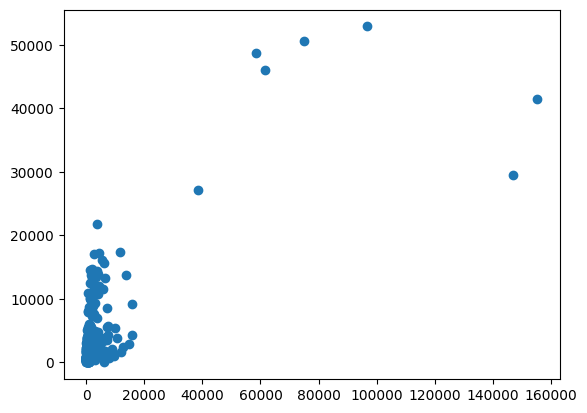

In [15]:
x, y = df['ev_sales'], df['incidences_trap']

print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.26930462]
 [0.26930462 1.        ]]


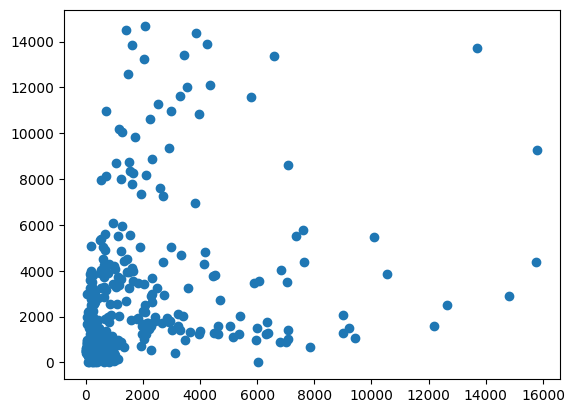

In [16]:
# remove outliers

def remove_out(df, cols):
    for col in cols:
        df = df[(np.abs(stats.zscore(df[col])) < 3)]
    return df
        
tdf = remove_out(df, ['ev_sales', 'incidences_trap'])
x, y = tdf['ev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.12107032]
 [0.12107032 1.        ]]


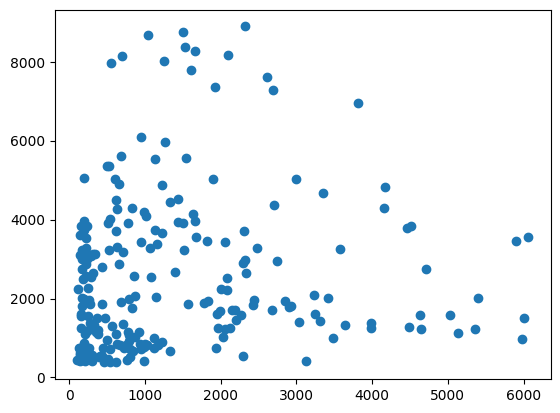

In [17]:
# ev_sales and incidence_trap

min_trap, max_trap = np.percentile(df['incidences_trap'], 10), np.percentile(df['incidences_trap'], 90)
min_ev, max_ev = np.percentile(df['ev_sales'], 10), np.percentile(df['ev_sales'], 90)

filtr = (df['ev_sales'] < max_ev) & (df['ev_sales'] > min_ev) & (df['incidences_trap'] < max_trap) & (df['incidences_trap'] > min_trap)
tdf = df[filtr]
x, y = tdf['ev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

[[1.         0.50452159]
 [0.50452159 1.        ]]


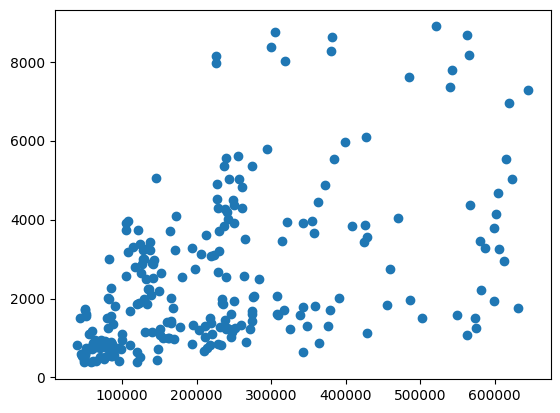

In [18]:
# non ev sales

tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidences_trap'], 10), np.percentile(tdf['incidences_trap'], 90)
min_ev, max_ev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)

filtr = (tdf['nonev_sales'] < max_ev) & (tdf['nonev_sales'] > min_ev) & (tdf['incidences_trap'] < max_trap) & (tdf['incidences_trap'] > min_trap)
tdf = tdf[filtr]
x, y = tdf['nonev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))
plt.scatter(x, y)

In [19]:
tdf = tdf[tdf['year']>2013]
x, y = tdf['nonev_sales'], tdf['incidences_trap']
print(np.corrcoef(x,y))

[[1.         0.48234953]
 [0.48234953 1.        ]]


In [20]:
replace_year = {i:j for i, j in zip(range(2011, 2020), range(1, 12))}
df['year_fixed'] = df['year'].replace(replace_year)

In [21]:
df = df.rename(columns={'ZEV Mandates': 'ZEV_Mandates', 'EPA Region': 'EPA_Region'})

In [22]:
df.to_csv("output_files/for_R_pm10.csv", index=False)

In [23]:
tdf = df[df['year']>=2013]
min_trap, max_trap = np.percentile(tdf['incidences_trap'], 10), np.percentile(tdf['incidences_trap'], 90)
min_nonev, max_nonev = np.percentile(tdf['nonev_sales'], 10), np.percentile(tdf['nonev_sales'], 90)
min_ev, max_ev = np.percentile(tdf['ev_sales'], 10), np.percentile(tdf['ev_sales'], 90)


filtr = (tdf['ev_sales'] < max_ev) & (tdf['ev_sales'] > min_ev) & (tdf['nonev_sales'] < max_nonev) & (tdf['nonev_sales'] > min_nonev) & (tdf['incidences_trap'] < max_trap) & (tdf['incidences_trap'] > min_trap)
tdf = tdf[filtr]
tdf.to_csv("output_files/for_R_pm10_filter_by_per_v2.csv", index=False)

In [24]:
def get_IQR(df, col):
    return np.percentile(tdf[col], 75) - np.percentile(tdf[col], 25)

-8.904e-02  * get_IQR(tdf, 'ev_sales'),  4.752e-03* get_IQR(tdf, 'nonev_sales')

(-152.41422, 794.360952)

In [23]:
get_IQR(tdf, 'ev_sales')

1743.75

In [22]:
-2.136e-02 * get_IQR(tdf, 'ev_sales')

-37.2465

In [25]:
get_IQR(tdf, 'nonev_sales')

167163.5